In [1]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm
import colormaps as cmaps
from colormaps.utils import show_cmaps_collection
from scipy.optimize import curve_fit



In [2]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Increasing Ablation

Grounding Line Plot - Amin - 0.1

In [3]:
gl_run_title_amin1 = str("Grounding Line Evolution Over Time - Max Ablation - 0.1")
amin1 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_26__16_20_09.pkl.gz"
with gzip.open(amin1, 'rb') as f:
    DATA_dict_amin1 = pickle.load(f)

In [4]:
bed_dict = DATA_dict_amin1['bed_dict']
base_dict = DATA_dict_amin1['base_dict']
surf_dict= DATA_dict_amin1['surf_dict']
sed_dict = DATA_dict_amin1['sed_dict']
H_dict = DATA_dict_amin1['H_dict']
us_dict_1 = DATA_dict_amin1['us_dict']
ub_dict_1 = DATA_dict_amin1['ub_dict']
Hs_dict = DATA_dict_amin1['Hs_dict']
GL_dict_1 = DATA_dict_amin1['GL_dict']
Qs_dict_1 = DATA_dict_amin1['Qs_dict']

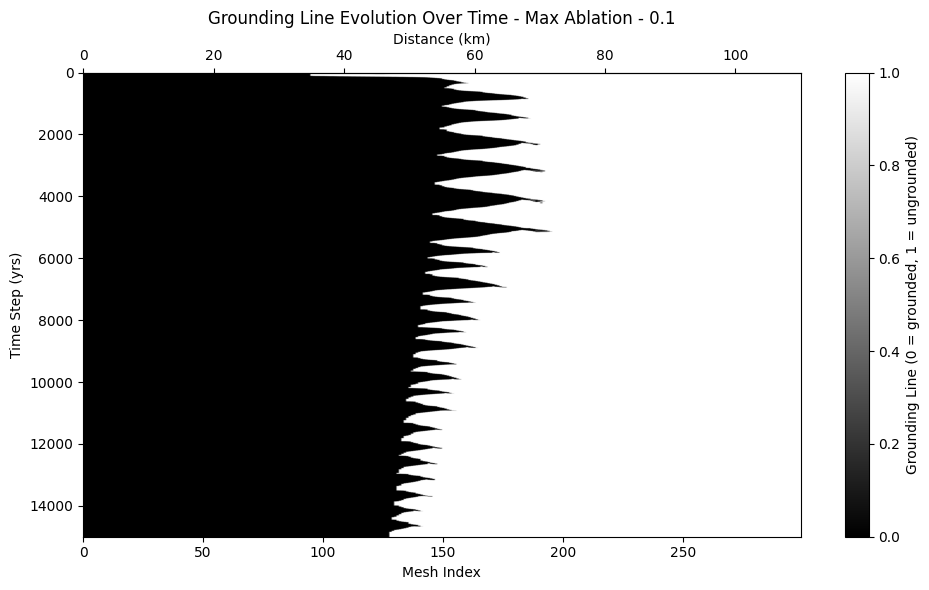

In [5]:
GL_dict = DATA_dict_amin1['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin1)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [6]:
gl_positions_amin1 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin1.append(idx)

gl_positions_amin1 = np.array(gl_positions_amin1)
GL_km_amin1 = mesh_index_to_km(gl_positions_amin1)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amin1 = GL_km_amin1[mask]


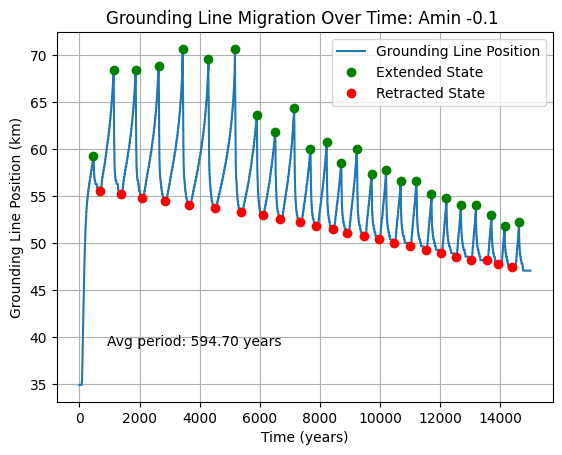

Mean cycle period: 594.70 years
[674.60801648 721.10593334 755.54657117 808.58369559 835.96918
 882.63877984 714.84699811 587.81208026 668.6779342  536.24317038
 544.80220209 472.6897172  578.76013168 483.95987791 503.84872266
 521.18718881 528.7548761  498.81248351 499.27638375 500.71196053
 528.22464001 388.78792008 442.23683581]
Mean advance amplitude: 60.33 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 70.63545151 63.64548495 61.80602007 64.3812709  59.96655518 60.70234114
 58.49498328 59.96655518 57.39130435 57.75919732 56.65551839 56.65551839
 55.18394649 54.81605351 54.08026756 54.08026756 52.97658863 51.8729097
 52.24080268]
Mean retreat amplitude: 51.37 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565 52.24080268 51.8729097  51.50501672
 51.13712375 50.76923077 50.40133779 50.03344482 49.66555184 49.29765886
 48.92976589 48.56187291 48.19397993 48.19397993 47.82608696 47.45819398]


In [7]:
peaks_amin1, _ = find_peaks(GL_km_amin1, prominence=3) 
troughs_amin1, _ = find_peaks(-GL_km_amin1, prominence=3)     
periods_amin1 = np.diff(np.array(time)[troughs_amin1])
adv_dists_amin1 = GL_km_amin1[peaks_amin1]
ret_dists_amin1 = GL_km_amin1[troughs_amin1]


plt.plot(time, GL_km_amin1, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin1], GL_km_amin1[peaks_amin1], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin1], GL_km_amin1[troughs_amin1], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin1):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin -0.1 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin1):.2f} years")
print(periods_amin1)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin1):.2f} km")
print(adv_dists_amin1)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin1):.2f} km")
print(ret_dists_amin1)


18915.402954221456


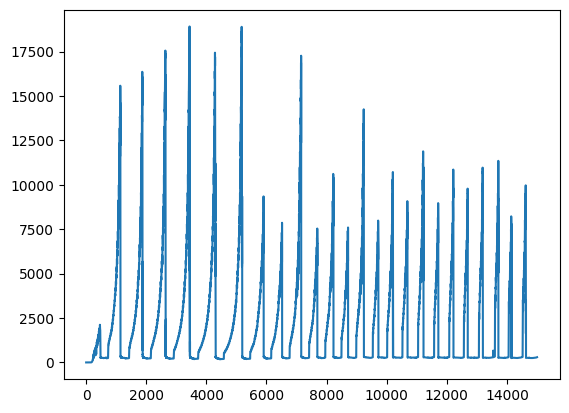

In [8]:
max_Qs_1 = np.array([max(values) for values in Qs_dict_1.values()])
time_1 = np.array(list(Qs_dict_1.keys()))

plt.plot(time_1, max_Qs_1)
MAX_1 = np.max(max_Qs_1)

print(MAX_1)

Grounding Line Plot - Amin - 0.05


In [9]:
gl_run_title_amin05 = str("Grounding Line Evolution Over Time - Max Ablation -0.05")
amin05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__13_34_05.pkl.gz"
with gzip.open(amin05, 'rb') as f:
    DATA_dict_amin05 = pickle.load(f)

In [10]:
bed_dict = DATA_dict_amin05['bed_dict']
base_dict = DATA_dict_amin05['base_dict']
surf_dict= DATA_dict_amin05 ['surf_dict']
sed_dict = DATA_dict_amin05['sed_dict']
H_dict = DATA_dict_amin05['H_dict']
us_dict_05 = DATA_dict_amin05['us_dict']
ub_dict_05 = DATA_dict_amin05['ub_dict']
Hs_dict = DATA_dict_amin05['Hs_dict']
GL_dict_05 = DATA_dict_amin05['GL_dict']
Qs_dict_05 = DATA_dict_amin05['Qs_dict']

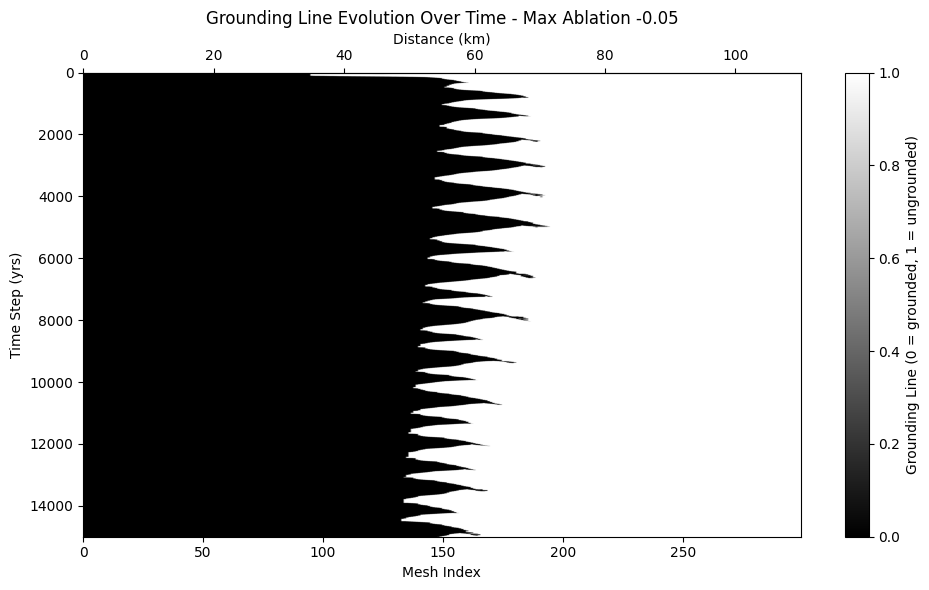

In [11]:
GL_dict = DATA_dict_amin05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [12]:
gl_positions_amin05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin05.append(idx)

gl_positions_amin05 = np.array(gl_positions_amin05)
GL_km_amin05 = mesh_index_to_km(gl_positions_amin05)



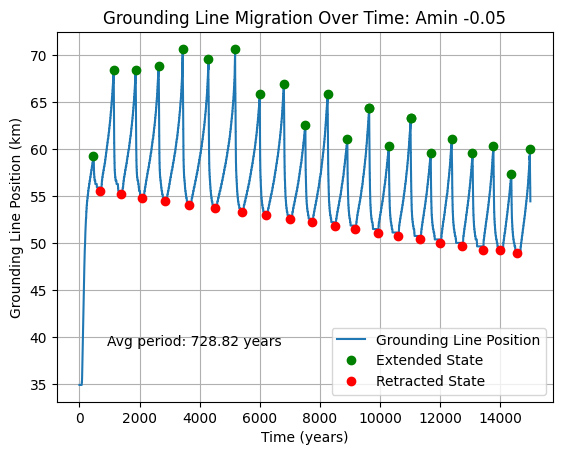

Mean cycle period: 728.82 years
[674.60801648 721.10593334 755.54657117 808.58369559 835.96918
 907.55549728 795.67821196 811.28920989 722.6504842  759.52189009
 673.90914176 752.36166965 665.92567288 742.24751793 672.3174244
 724.23856121 691.54975617 574.3564487  558.11747815]
Mean advance amplitude: 63.98 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 70.63545151 65.85284281 66.95652174 62.54180602 65.85284281 61.07023411
 64.3812709  64.3812709  60.33444816 63.27759197 63.27759197 59.59866221
 61.07023411 59.59866221 60.33444816 57.39130435 59.96655518]
Mean retreat amplitude: 52.09 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565 52.24080268 51.8729097  51.50501672
 51.13712375 50.76923077 50.40133779 50.03344482 49.66555184 49.29765886
 49.29765886 48.92976589]


In [13]:
peaks_amin05, _ = find_peaks(GL_km_amin05, prominence=2.8) 
troughs_amin05, _ = find_peaks(-GL_km_amin05, prominence=2.8)     
periods_amin05 = np.diff(np.array(time)[troughs_amin05])
adv_dists_amin05 = GL_km_amin05[peaks_amin05]
ret_dists_amin05 = GL_km_amin05[troughs_amin05]


plt.plot(time, GL_km_amin05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin05], GL_km_amin05[peaks_amin05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin05], GL_km_amin05[troughs_amin05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin -0.05")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin05):.2f} years")
print(periods_amin05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin05):.2f} km")
print(adv_dists_amin05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin05):.2f} km")
print(ret_dists_amin05)


20143.09688539491


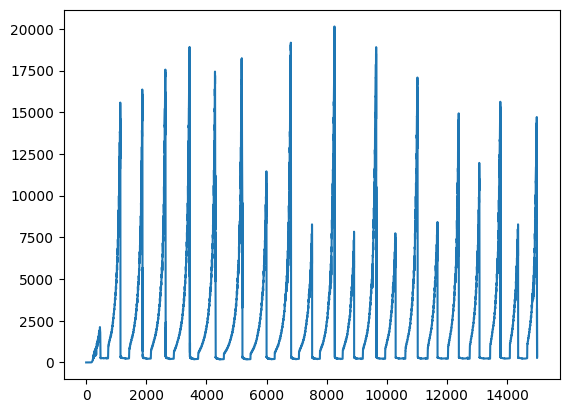

In [14]:
max_Qs_05 = np.array([max(values) for values in Qs_dict_05.values()])
time_05 = np.array(list(Qs_dict_05.keys()))

# mask = time_05 <= 10000

# time_05 = time_05[mask]
# max_Qs_05 = max_Qs_05[mask]
plt.plot(time_05, max_Qs_05)
MAX_05 = np.max(max_Qs_05)

# MAX_21 = np.median(max_Qs_55)
print(MAX_05)

Grounding Line Plot - Amin - 0.01


In [15]:
gl_run_title_amin01 = str("Grounding Line Evolution Over Time - Max Ablation - 0.01")
amin01 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__15_43_18.pkl.gz"
with gzip.open(amin01, 'rb') as f:
    DATA_dict_amin01 = pickle.load(f)

In [16]:
bed_dict = DATA_dict_amin01['bed_dict']
base_dict = DATA_dict_amin01['base_dict']
surf_dict= DATA_dict_amin01['surf_dict']
sed_dict = DATA_dict_amin01['sed_dict']
H_dict = DATA_dict_amin01['H_dict']
us_dict_01 = DATA_dict_amin01['us_dict']
ub_dict_01 = DATA_dict_amin01['ub_dict']
Hs_dict = DATA_dict_amin01['Hs_dict']
GL_dict_01 = DATA_dict_amin01['GL_dict']
Qs_dict_01 = DATA_dict_amin01['Qs_dict']

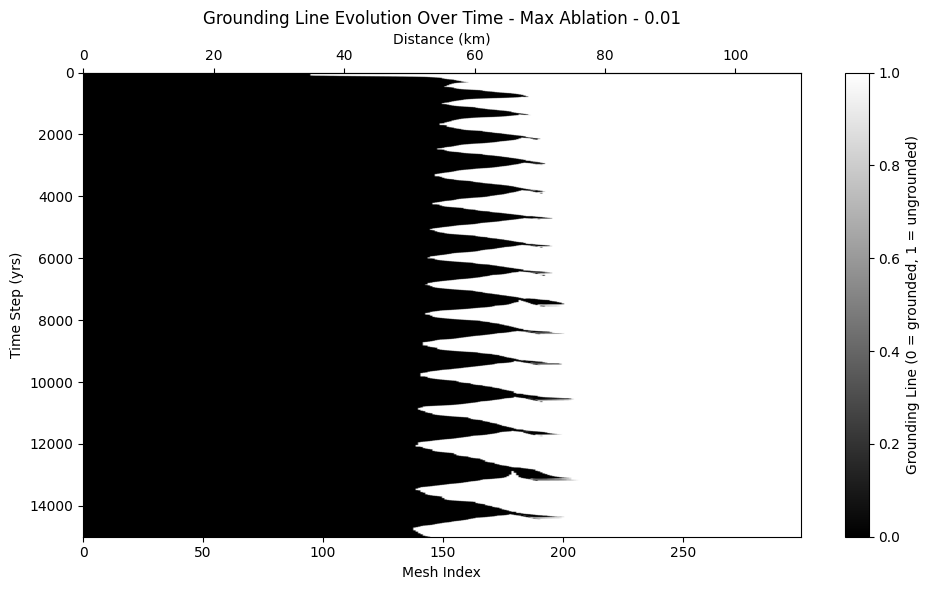

In [17]:
GL_dict = DATA_dict_amin01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [18]:
gl_positions_amin01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin01.append(idx)

gl_positions_amin01 = np.array(gl_positions_amin01)
GL_km_amin01 = mesh_index_to_km(gl_positions_amin01)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amin01 = GL_km_amin01[mask]


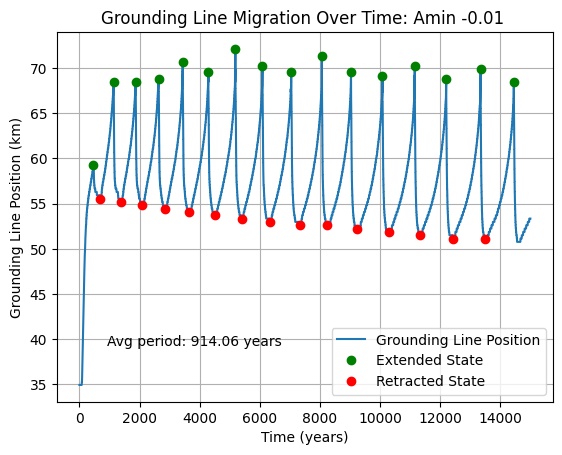

Mean cycle period: 914.06 years
[ 674.60801648  721.10593334  755.54657117  808.58369559  835.96918
  908.56902044  948.91888932  991.1660079   900.97939746  974.65520457
 1077.58645133 1024.11379998 1119.75016796 1055.25970088]
Mean advance amplitude: 69.03 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 72.10702341 70.26755853 69.53177258 71.37123746 69.53177258 69.1638796
 70.26755853 68.79598662 69.89966555 68.42809365]
Mean retreat amplitude: 53.15 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097
 51.50501672 51.13712375 51.13712375]


In [19]:
peaks_amin01, _ = find_peaks(GL_km_amin01, prominence=3) 
troughs_amin01, _ = find_peaks(-GL_km_amin01, prominence=3)     
periods_amin01 = np.diff(np.array(time)[troughs_amin01])
adv_dists_amin01 = GL_km_amin01[peaks_amin01]
ret_dists_amin01 = GL_km_amin01[troughs_amin01]


plt.plot(time, GL_km_amin01, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin01], GL_km_amin01[peaks_amin01], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin01], GL_km_amin01[troughs_amin01], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin01):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin01):.2f} years")
print(periods_amin01)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin01):.2f} km")
print(adv_dists_amin01)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin01):.2f} km")
print(ret_dists_amin01)


20331.37316106572


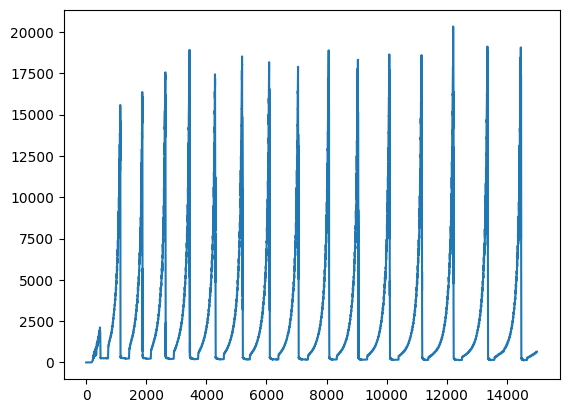

In [20]:
max_Qs_01 = np.array([max(values) for values in Qs_dict_01.values()])
time_01 = np.array(list(Qs_dict_01.keys()))

plt.plot(time_01, max_Qs_01)
MAX_01 = np.max(max_Qs_01)

print(MAX_01)

Grounding Line Plot - Amin & Amax -0.05


In [21]:
gl_run_title_amax_amin_05 = str("Grounding Line Evolution Over Time - Ablation & Accumulation - 0.05")
amax_amin_05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_27__09_23_02.pkl.gz"
with gzip.open(amax_amin_05, 'rb') as f:
    DATA_dict_amax_amin_05 = pickle.load(f)

In [22]:
bed_dict = DATA_dict_amax_amin_05['bed_dict']
base_dict = DATA_dict_amax_amin_05['base_dict']
surf_dict= DATA_dict_amax_amin_05['surf_dict']
sed_dict = DATA_dict_amax_amin_05['sed_dict']
H_dict = DATA_dict_amax_amin_05['H_dict']
us_dict_accabl = DATA_dict_amax_amin_05['us_dict']
ub_dict_accabl = DATA_dict_amax_amin_05['ub_dict']
Hs_dict = DATA_dict_amax_amin_05['Hs_dict']
GL_dict_ = DATA_dict_amax_amin_05['GL_dict']
Qs_dict_accabl = DATA_dict_amax_amin_05['Qs_dict']

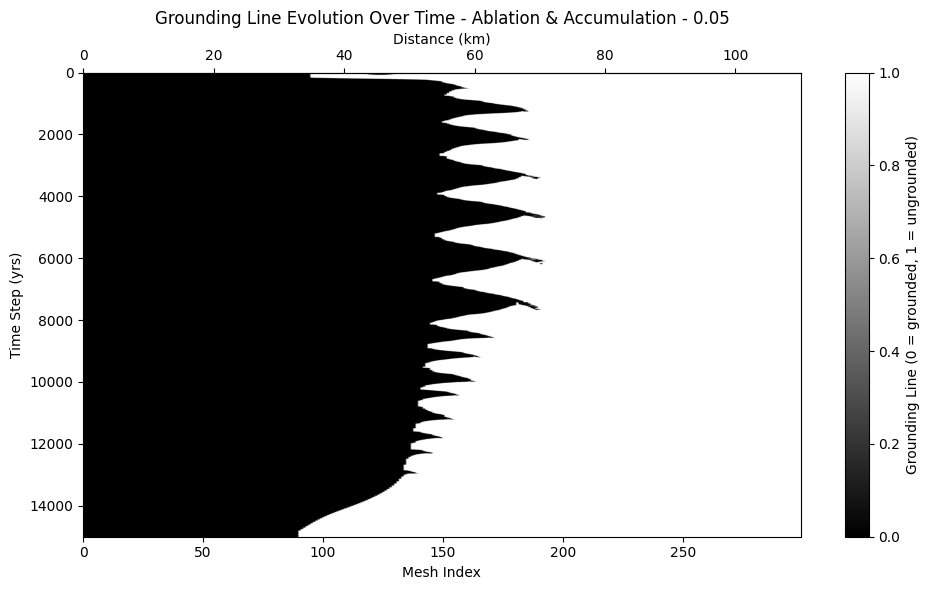

In [23]:
GL_dict = DATA_dict_amax_amin_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax_amin_05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [24]:
gl_positions_amax_amin_05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax_amin_05.append(idx)

gl_positions_amax_amin_05 = np.array(gl_positions_amax_amin_05)
GL_km_amax_amin_05 = mesh_index_to_km(gl_positions_amax_amin_05)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax_amin_05 = GL_km_amax_amin_05[mask]


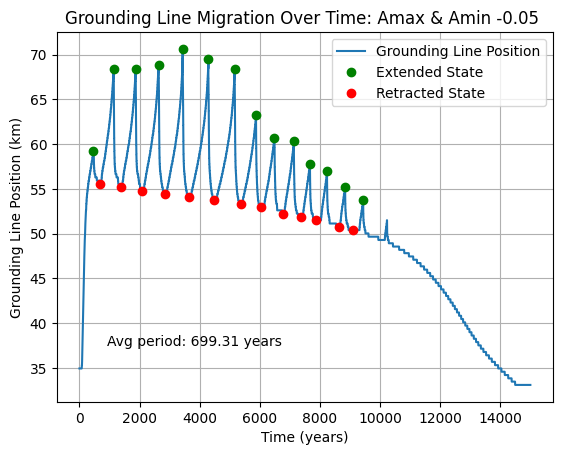

Mean cycle period: 699.31 years
[674.60801648 721.10593334 755.54657117 808.58369559 835.96918
 873.88088649 679.06842658 736.46121244 574.51140913 510.526198
 752.56438753 468.91284698]
Mean advance amplitude: 62.96 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 68.42809365 63.27759197 60.70234114 60.33444816 57.75919732 57.02341137
 55.18394649 53.71237458]
Mean retreat amplitude: 53.15 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.24080268 51.8729097  51.50501672 50.76923077
 50.40133779]


In [25]:
peaks_amax_amin_05, _ = find_peaks(GL_km_amax_amin_05, prominence=3) 
troughs_amax_amin_05, _ = find_peaks(-GL_km_amax_amin_05, prominence=3)     
periods_amax_amin_05 = np.diff(np.array(time)[troughs_amax_amin_05])
adv_dists_amax_amin_05 = GL_km_amax_amin_05[peaks_amax_amin_05]
ret_dists_amax_amin_05 = GL_km_amax_amin_05[troughs_amax_amin_05]


plt.plot(time, GL_km_amax_amin_05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax_amin_05], GL_km_amax_amin_05[peaks_amax_amin_05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax_amin_05], GL_km_amax_amin_05[troughs_amax_amin_05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax_amin_05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax & Amin -0.05 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax_amin_05):.2f} years")
print(periods_amax_amin_05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax_amin_05):.2f} km")
print(adv_dists_amax_amin_05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax_amin_05):.2f} km")
print(ret_dists_amax_amin_05)


In [26]:
time_amin_amax = np.array(list(Qs_dict_accabl.keys()))


## Relationship Plots

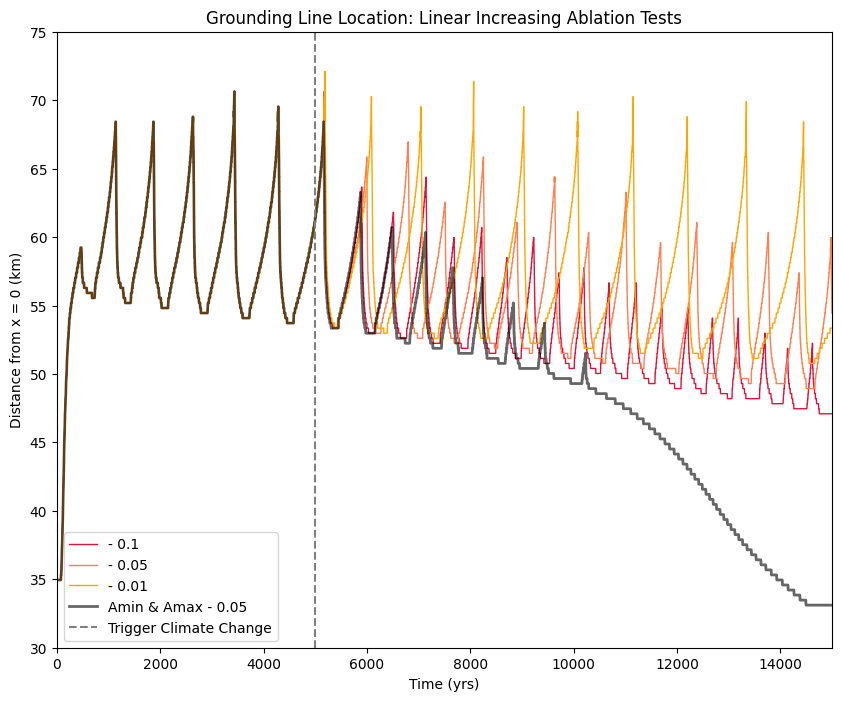

In [38]:
plt.figure(figsize=(10, 8))

plt.plot(time_1, GL_km_amin1, label='- 0.1', color = 'crimson', linewidth = 1)
plt.plot(time_05, GL_km_amin05, label='- 0.05', color = 'coral', linewidth = 1)
plt.plot(time_01, GL_km_amin01, label='- 0.01', color = 'orange', linewidth = 1)
plt.plot(time_amin_amax, GL_km_amax_amin_05, color = 'black', label='Amin & Amax - 0.05', linewidth = 2, alpha = 0.6)
plt.axvline(x=5000, color ='gray', linestyle = '--', label = 'Trigger Climate Change')

plt.xlim(0,15000)
plt.ylim(30,75)

plt.title("Grounding Line Location: Linear Increasing Ablation Tests") 
plt.xlabel("Time (yrs)")
plt.ylabel("Distance from x = 0 (km)")
plt.legend(loc = 3)